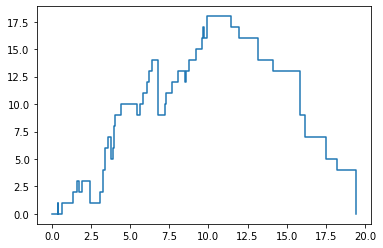

Tiempo de simulación:  19.438354376993225
Tiempo medio en el sistema: 5.952049806112513
Tiempo medio en la cola:  5.365948899406885
Máx clientes en el sistema 18


In [0]:
import random
import math
from sympy import Symbol
from sympy import integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt

def generador_aleatorio():
    """
    Genera una variable aleatoria
    con una distribución uniforme.

    Randum
    
    xo = 123456789
    a = 65539
    c = 0
    m = 2**31
    xi = (a * xo + c) % m
    xo = xi
    U = xi / m
    """
    return random.random()

def exponencial(valor_lambda):

    n_aleatorio = generador_aleatorio()
    value = - (math.log(1 - n_aleatorio) / float(valor_lambda))
    return value

def normal():

    n_aleatorio = generador_aleatorio()
    raiz_cuadrada = math.sqrt(-2 * math.log1p(n_aleatorio - 1))
    sen = math.sin(2 * math.pi * n_aleatorio)
    value = raiz_cuadrada * sen
    if(value < 0):
        value = 0
    return value
"""
def normal():
    u = 3 #miu
    o = 4 
    n_aleatorio = 0
    n_aleatorio = generador_aleatorio()

    x = Symbol('x')
    f = lambda x:(2/math.sqrt(math.pi))*(math.exp( x ))**2
    float(o)
    float(u)
    f_error = quad(f,0,n_aleatorio)
    float(f_error[0])
    d_normal = u + o * math.sqrt(2) * f_error[0]

    if(d_normal < 0):
        d_normal = 0
    return d_normal
"""
def llega(tiempo_actual):
    global tiempo
    global n_clientes
    global n_llegadas
    global llegadas
    global valor_lambda
    global Tiempo_limite
    global tiempos_principales
    global cantidad_cli_sist, tiempos

    tiempo = tiempo_actual

    cantidad_cli_sist.append(n_clientes)
    tiempos.append(tiempo)

    n_clientes = n_clientes + 1
    n_llegadas += 1

    cantidad_cli_sist.append(n_clientes)
    tiempos.append(tiempo)

    llegadas.append(tiempo)
    nuevo_tiempo_simulacion = exponencial(valor_lambda)
    if(tiempo + nuevo_tiempo_simulacion < Tiempo_limite):
        tiempos_principales['tllegadas'] = tiempo + nuevo_tiempo_simulacion
    if(n_clientes == 1):
        tiempo_simulado_servicio = normal()
        tiempos_principales['tsalidas'] = tiempo + tiempo_simulado_servicio
        tservicios.append(tiempo_simulado_servicio)
        

def servidor(tiempo_actual):
    global tiempo
    global n_clientes
    global n_salidas
    global salidas
    global tiempos_principales
    global cantidad_cli_sist, tiempos

    tiempo = tiempo_actual

    cantidad_cli_sist.append(n_clientes)
    tiempos.append(tiempo)

    n_clientes -= 1
    n_salidas += 1
    salidas.append(tiempo)

    cantidad_cli_sist.append(n_clientes)
    tiempos.append(tiempo)

    if(n_clientes > 0):
        tiempo_simulado_servicio = normal()
        tiempos_principales['tsalidas'] = tiempo + tiempo_simulado_servicio
        tservicios.append(tiempo_simulado_servicio)


tiempo = 0 
n_clientes = 0
n_llegadas = 0
n_salidas = 0
Tiempo_limite = 10
tp = 0
tiempo_actual = 0

t_med_sistema = 0
t_med_espera = 0

salidas = []
llegadas = []
tservicios = []

cantidad_cli_sist = [0] # Eje Y
tiempos = [0]   # Eje X

M = 9999999999

tiempos_principales = {
    'tllegadas': M,
    'tsalidas': M
}

valor_lambda = 4
tiempo_actual = exponencial(valor_lambda)

if tiempo_actual > Tiempo_limite:
    tp = 0
    t_med_sistema = 0
    t_med_espera = 0
else:
    llega(tiempo_actual)
    
    while(tiempos_principales['tllegadas'] != M or tiempos_principales['tsalidas'] != M):
        if(tiempos_principales['tllegadas'] < tiempos_principales['tsalidas']):
            nuevo_tiempo_simulacion = tiempos_principales['tllegadas']
            tiempos_principales['tllegadas'] = M
            llega(nuevo_tiempo_simulacion)
        if(tiempos_principales['tsalidas'] < tiempos_principales['tllegadas']):
            nuevo_tiempo_simulacion = tiempos_principales['tsalidas']
            tiempos_principales['tsalidas'] = M
            servidor(nuevo_tiempo_simulacion)
    
    tp = max(0, tiempo - Tiempo_limite)
    acumulo1 = 0
    acumulo2 = 0
    ind = 0
    while ind < n_llegadas:
        acumulo1 += salidas[ind] - llegadas[ind]
        acumulo2 += salidas[ind] - llegadas[ind] - tservicios[ind]
        ind += 1
    
    t_med_sistema = acumulo1 / n_llegadas
    t_med_espera = acumulo2 / n_llegadas

plt.plot(tiempos, cantidad_cli_sist)
plt.show()

print("Tiempo de simulación: ",tiempo)
print("Tiempo medio en el sistema:",t_med_sistema)
print("Tiempo medio en la cola: ",t_med_espera)
print("Máx clientes en el sistema",max(cantidad_cli_sist))